In [1]:
#importe the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.linalg import svd
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [2]:
df = pd.read_csv('../../Data/f_churn.csv')

In [3]:
df.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [4]:
df = df.drop(['Unnamed: 0'],axis = 1)
X=df.drop(['Exited'],axis = 1)
y=df['Exited']

In [ ]:
df.shape

In [5]:
features = X.values[:,:]
target = y.values[:]

In [6]:
target

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [7]:
# define a matrix
A = features
print("A=", A)

# SVD
U, S, V_T = svd(A)

# left singular vectors
print("U=", U)

# singular values
print("S=",S)

#right singular vectors
print("V_T", V_T)

A= [[619.  42.   2. ...   0.   0.   1.]
 [608.  41.   1. ...   0.   1.   1.]
 [502.  42.   8. ...   0.   0.   1.]
 ...
 [709.  36.   7. ...   0.   0.   1.]
 [772.  42.   3. ...   1.   0.   0.]
 [792.  28.   4. ...   0.   0.   1.]]
U= [[-5.69228335e-03 -1.04650951e-02 -8.80243479e-03 ... -1.09784515e-02
  -1.19952876e-02 -1.23823689e-02]
 [-1.00588589e-02 -7.23634814e-04 -5.17737089e-04 ...  4.31423175e-03
   2.94352565e-03  1.53594420e-02]
 [-1.35199439e-02  8.99588838e-03  9.17398774e-03 ... -5.88995493e-03
   9.23551818e-03  4.71636863e-03]
 ...
 [-2.36388334e-03 -4.34570894e-03 -1.90154805e-02 ...  9.98859847e-01
   2.84928995e-04 -2.67943617e-04]
 [-8.56559087e-03  1.70318687e-04 -9.14227969e-03 ...  2.79937136e-04
   9.99031298e-01 -1.10085042e-04]
 [-7.94964399e-03  1.29785466e-02 -1.21067430e-02 ... -2.56959867e-04
  -1.11018020e-04  9.98910579e-01]]
S= [1.39432539e+07 6.02265276e+06 2.94483606e+04 1.18143093e+03
 2.96010118e+02 6.06954740e+01 5.93727578e+01 5.05451977e+01
 4.92

In [8]:
print(A.shape)
print(U.shape)
print(S.shape)
print(V_T.shape)

(10000, 12)
(10000, 10000)
(12,)
(12, 12)


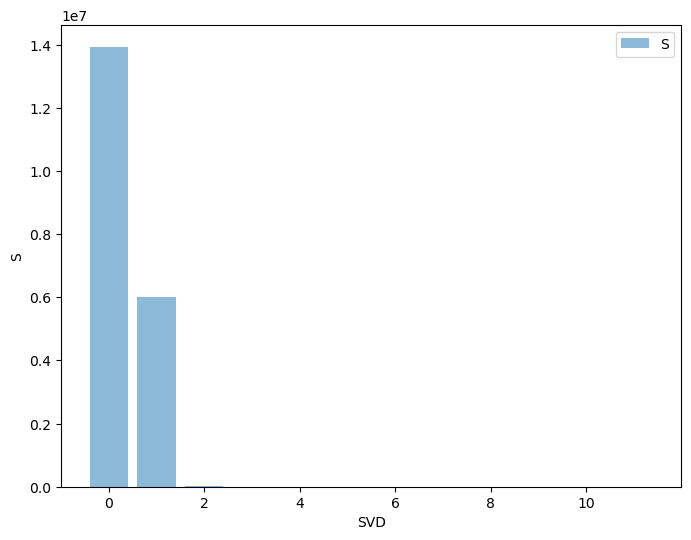

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(range(12), S, alpha=0.5, align='center', label='S')
plt.legend()
plt.ylabel('S')
plt.xlabel('SVD')
plt.show()

In [16]:
A1 = csr_matrix(features)
svd1 = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd1.fit(A1)
TruncatedSVD(n_components=2, n_iter=7, random_state=42)


TruncatedSVD(n_iter=7, random_state=42)

In [17]:
svd1.singular_values_

array([13943253.90370025,  6022652.76264023])

In [18]:
svd1.explained_variance_ratio_

array([0.49698588, 0.50300402])

In [19]:
svd1.explained_variance_ratio_.sum()

0.9999898974539709